<a href="https://colab.research.google.com/github/coding-geek1711/DeepLearningBabySteps/blob/master/DeepLearningMnistDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
tf.__version__

'1.15.0'

### MNIST DATASET IS THE HELLO WORLD OF DEEP LEARNING
Mnist dataset contains 28 x 28 images of handwritten digits from 0 to 9

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = tf.keras.utils.normalize(X_train, axis = 1)

X_test = tf.keras.utils.normalize(X_test, axis = 1)       ## normalization is done to convert data between 0 and 1 to help net train faster

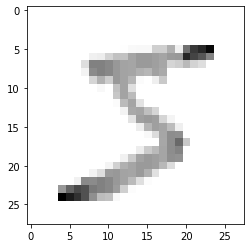

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

### We build our Neural Net now

In [0]:
model = tf.keras.models.Sequential()
# Input Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] 
              )

In [16]:
model.fit(X_train, y_train, validation_split = 0.1,epochs=5)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 4s 81us/sample - loss: 0.0324 - acc: 0.9891 - val_loss: 0.0292 - val_acc: 0.9898
Epoch 2/5
54000/54000 [==============================] - 4s 81us/sample - loss: 0.0254 - acc: 0.9914 - val_loss: 0.0398 - val_acc: 0.9870
Epoch 3/5
54000/54000 [==============================] - 4s 81us/sample - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0397 - val_acc: 0.9868
Epoch 4/5
54000/54000 [==============================] - 4s 80us/sample - loss: 0.0183 - acc: 0.9938 - val_loss: 0.0432 - val_acc: 0.9853
Epoch 5/5
54000/54000 [==============================] - 4s 80us/sample - loss: 0.0140 - acc: 0.9951 - val_loss: 0.0522 - val_acc: 0.9842


In [17]:
val_loss, val_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.1100 - acc: 0.9725


In [18]:
model.save('model_1.model')
new_model = tf.keras.models.load_model('model_1.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
predictions = new_model.predict(X_test)

In [20]:
print(predictions)

[[2.18532806e-13 1.69241899e-12 1.37889110e-11 ... 9.99999881e-01
  6.24399837e-12 2.23716046e-09]
 [6.04567557e-13 9.29985561e-07 9.99999046e-01 ... 2.93624743e-11
  8.33764391e-10 1.71793397e-21]
 [1.96291750e-11 9.99998927e-01 3.66637010e-09 ... 8.90343188e-07
  2.67055071e-07 2.74291926e-11]
 ...
 [1.61678600e-15 2.24409770e-12 3.47820324e-14 ... 1.06086461e-07
  1.53824542e-09 1.74045181e-06]
 [1.14748146e-15 4.14127560e-18 2.55497532e-21 ... 6.41128047e-15
  1.29951205e-09 6.08160570e-20]
 [1.56291606e-13 1.10815045e-10 3.75678932e-11 ... 2.12198287e-13
  1.06302327e-08 1.98133090e-16]]


In [21]:
import numpy as np
print(np.argmax(predictions[0]))

7


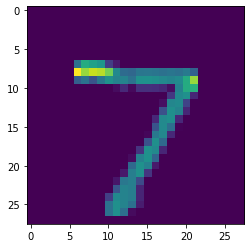

In [22]:
plt.imshow(X_test[0])
plt.show()